In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm.notebook import tqdm

(256, 384, 3)

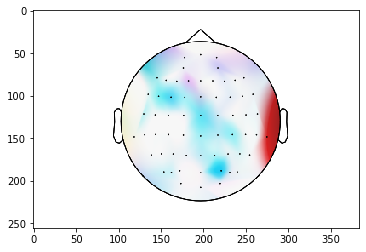

In [58]:
topo = cv2.imread('topomaps_RT_100/test/combined/0/bts_10003.png', cv2.IMREAD_COLOR)
plt.imshow(topo)
topo.shape

In [67]:
def resize_and_save(topo, path):
    ## (1) Convert to gray, and threshold
    gray = cv2.cvtColor(topo, cv2.COLOR_BGR2GRAY)
    th, threshed = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

    ## (2) Morph-op to remove noise
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    morphed = cv2.morphologyEx(threshed, cv2.MORPH_CLOSE, kernel)

    ## (3) Find the max-area contour
    cnts = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
    cnt = sorted(cnts, key=cv2.contourArea)[-1]

    x,y,w,h = cv2.boundingRect(cnt)
    dst = topo[y:y+h, x:x+w]
    
    cv2.imwrite(path, dst)


In [73]:
def load_resize_save(folder_name, t="train", label=0):
    main_path = os.path.join(folder_name, t, 'combined', str(label))
    bts_sample_paths = [os.path.join(main_path, bts) for bts in os.listdir(main_path)]
    
    for path in tqdm(bts_sample_paths):
        topo = cv2.imread(path, cv2.IMREAD_COLOR)
        resize_and_save(topo, path)

In [74]:
load_resize_save("topomaps_RT_100")

In [75]:
load_resize_save("topomaps_RT_100", label=1)

In [76]:
load_resize_save("topomaps_RT_100", label=3)

In [77]:
load_resize_save("topomaps_RT_100", "test", 0)
load_resize_save("topomaps_RT_100", "test", 1)
load_resize_save("topomaps_RT_100", "test", 3)

In [78]:
4797+19979+17739+1241+5021+4367

53144